<a href="https://www.kaggle.com/code/ishans24/svm-1?scriptVersionId=213753810" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
RANDOM_SEED=229

In [3]:
ds = tfds.load('german_credit_numeric')
ds = ds['train']
ds

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/german_credit_numeric/incomplete.XBO9GB_1.0.0/german_credit_numeric-train.…

Dataset german_credit_numeric downloaded and prepared to /root/tensorflow_datasets/german_credit_numeric/1.0.0. Subsequent calls will reuse this data.


<_PrefetchDataset element_spec={'features': TensorSpec(shape=(24,), dtype=tf.int32, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [4]:
print(len(ds))

1000


In [5]:
import os
for file in os.listdir('/root/tensorflow_datasets/german_credit_numeric/1.0.0'):
    print(file)

german_credit_numeric-train.tfrecord-00000-of-00001
label.labels.txt
dataset_info.json
features.json


In [6]:
print(type(ds))
for item in ds:
    print(item)
    print(type(item))
    break

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
{'features': <tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 3,  6,  4, 13,  2,  5,  1,  4,  3, 28,  3,  2,  2,  2,  1,  1,  0,
        1,  0,  0,  1,  0,  0,  1], dtype=int32)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=1>}
<class 'dict'>


In [7]:
for item in ds:
    for k in item.keys():
        print(k)
    break

features
label


In [8]:
features_list, label_list = [], []
for item in ds:
    features_list.append(item['features'].numpy())
    label_list.append(item['label'].numpy())
print(len(features_list), len(label_list))

1000 1000


In [9]:
df = pd.DataFrame(features_list)
df['label'] = label_list
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,label
0,3,6,4,13,2,5,1,4,3,28,...,1,0,1,0,0,1,0,0,1,1
1,4,4,2,6,1,2,2,3,1,23,...,0,0,1,0,1,0,0,1,0,1
2,4,24,4,20,1,3,2,4,3,37,...,1,0,1,0,0,1,0,0,1,1
3,4,18,2,11,5,2,2,2,1,21,...,0,0,1,0,1,0,0,0,1,1
4,4,6,2,13,3,3,1,4,1,62,...,0,0,1,0,0,1,0,0,1,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1000 non-null   int32
 1   1       1000 non-null   int32
 2   2       1000 non-null   int32
 3   3       1000 non-null   int32
 4   4       1000 non-null   int32
 5   5       1000 non-null   int32
 6   6       1000 non-null   int32
 7   7       1000 non-null   int32
 8   8       1000 non-null   int32
 9   9       1000 non-null   int32
 10  10      1000 non-null   int32
 11  11      1000 non-null   int32
 12  12      1000 non-null   int32
 13  13      1000 non-null   int32
 14  14      1000 non-null   int32
 15  15      1000 non-null   int32
 16  16      1000 non-null   int32
 17  17      1000 non-null   int32
 18  18      1000 non-null   int32
 19  19      1000 non-null   int32
 20  20      1000 non-null   int32
 21  21      1000 non-null   int32
 22  22      1000 non-null   int32
 23  23      1000 n

In [11]:
# relation between features and label
corr_matrix = df.corr()
target_corr = corr_matrix['label']
print(target_corr.sort_values(ascending=False))

label    1.000000
0        0.350847
2        0.228785
4        0.178943
20       0.134589
5        0.116002
10       0.109844
16       0.099791
9        0.091127
6        0.088184
14       0.082079
11       0.045732
13       0.036466
22       0.021822
23       0.013559
12       0.003015
17       0.000751
7       -0.002967
21      -0.005951
18      -0.062728
19      -0.092785
15      -0.096900
8       -0.142612
3       -0.154067
1       -0.214927
Name: label, dtype: float64


<Figure size 1200x800 with 0 Axes>

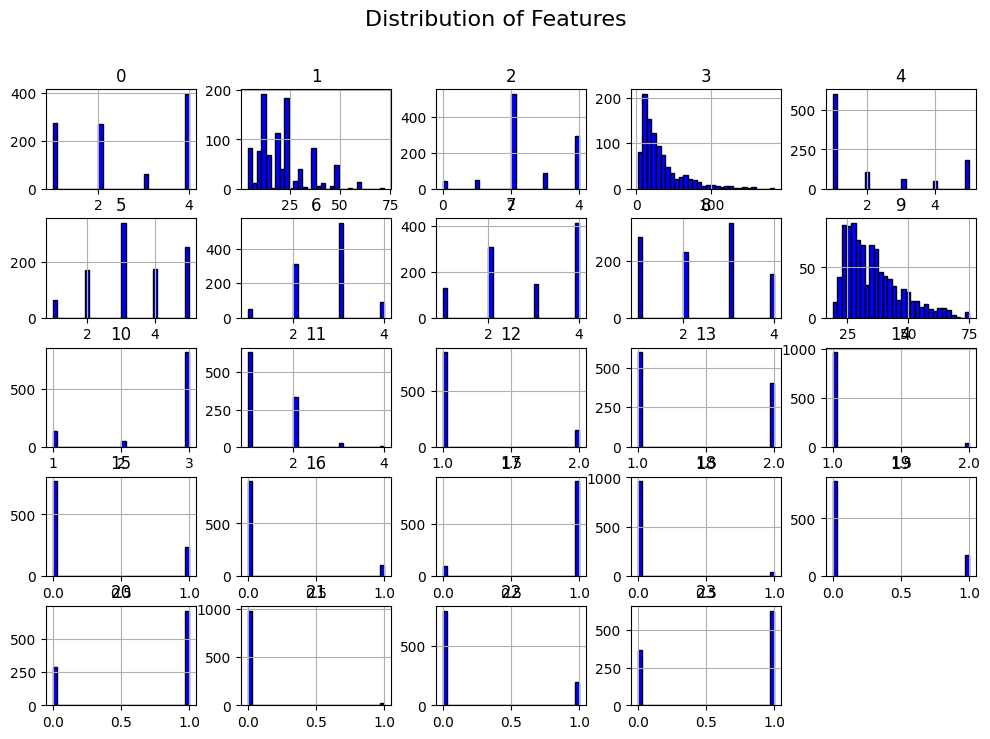

In [12]:
# distribution of features
plt.figure(figsize=(12, 8))
df.drop(columns=['label']).hist(bins=30, figsize=(12, 8), color='blue', edgecolor='black')
plt.suptitle('Distribution of Features', fontsize=16)
plt.show()

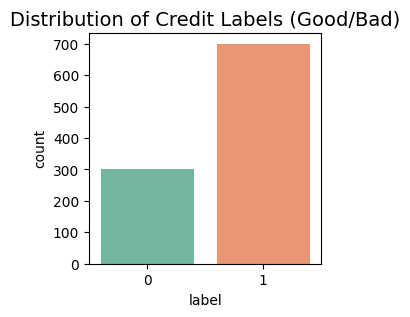

In [13]:
# distribution of the target variable `label`
plt.figure(figsize=(3, 3))
sns.countplot(data=df, x='label', palette='Set2')
plt.title('Distribution of Credit Labels (Good/Bad)', fontsize=14)
plt.show()

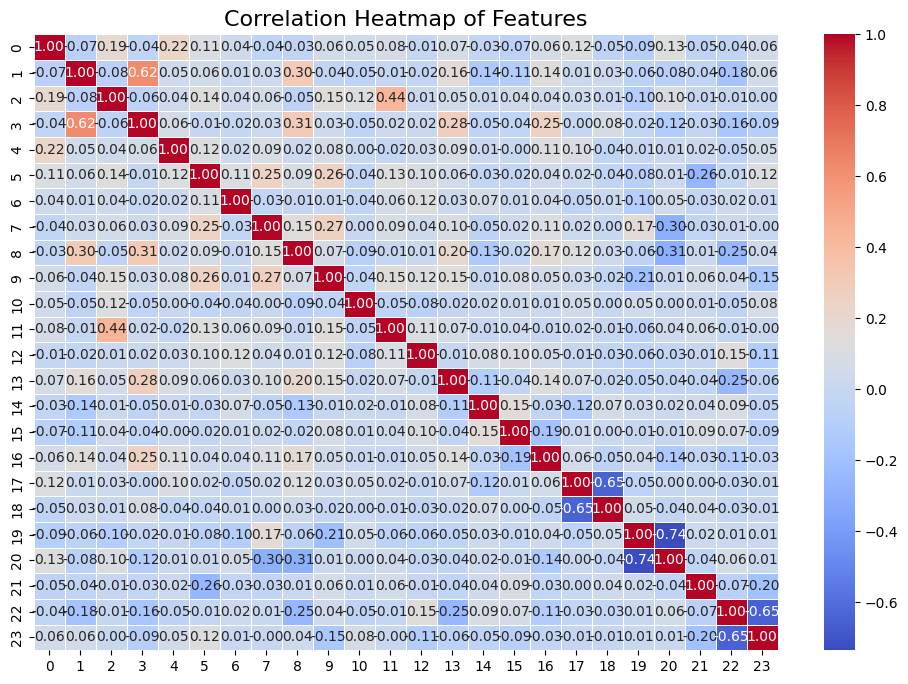

In [14]:
# correlation heatmap to explore feature relationships
plt.figure(figsize=(12, 8))
corr = df.drop(columns=['label']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

Number of outliers detected using Z-score: 179
Outliers detected using IQR:
0       0
1      70
2       0
3      72
4       0
5       0
6       0
7       0
8       0
9      23
10    186
11      6
12    155
13      0
14     37
15    234
16    103
17     93
18     41
19    179
20      0
21     22
22    200
23      0
dtype: int64


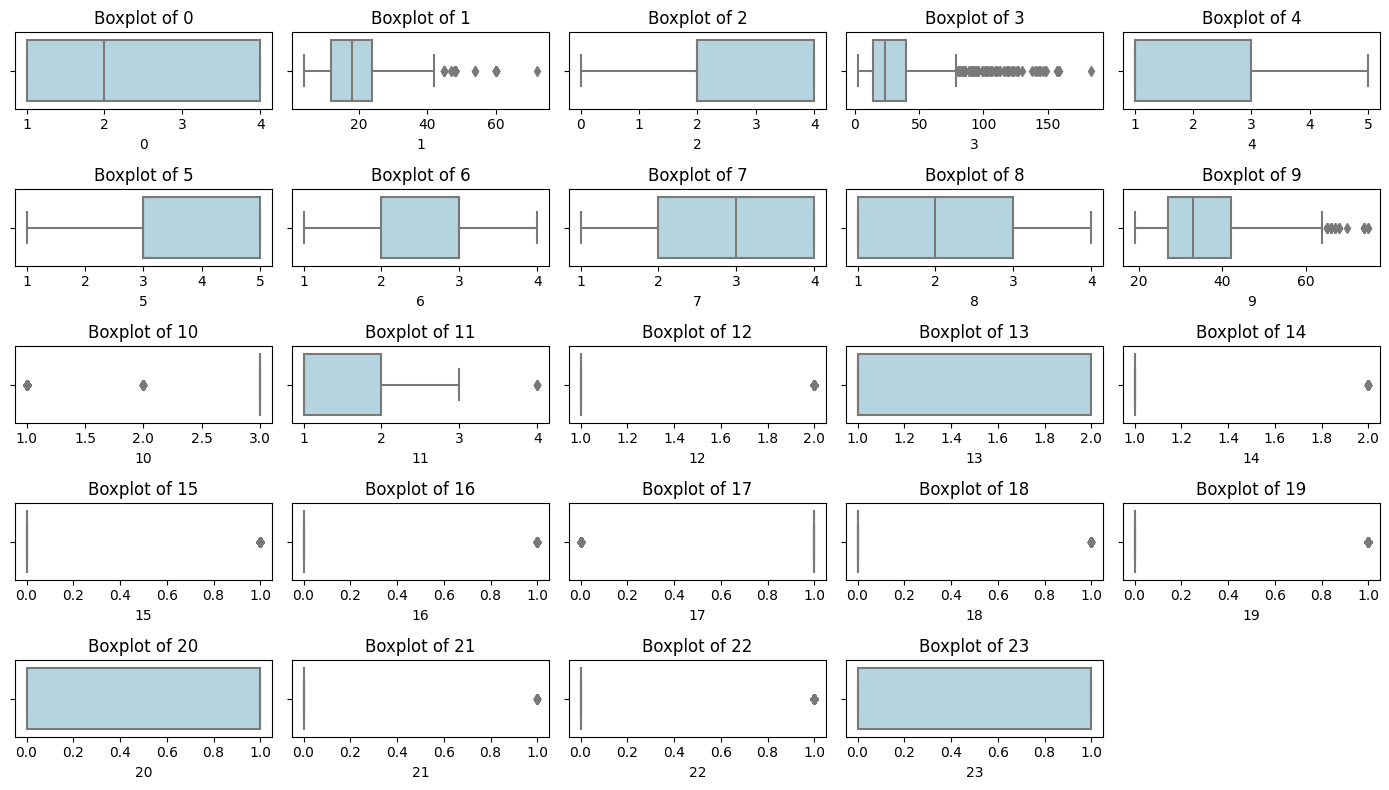

In [15]:
# Outlier Detection

# using Z-score to detect outliers
z_scores = np.abs(zscore(df.drop(columns=['label'])))
outliers_zscore = (z_scores > 3)

# consider a Z-score threshold of 3
# identify outliers (rows where any feature has a Z-score > 3)
outlier_indices_zscore = np.where(outliers_zscore.any(axis=1))[0]
print(f'Number of outliers detected using Z-score: {len(outlier_indices_zscore)}')

# using IQR (interquartile range) to detect outliers
Q1 = df.drop(columns=['label']).quantile(0.25)
Q3 = df.drop(columns=['label']).quantile(0.75)
IQR = Q3 - Q1

# identify outliers based on IQR
outliers_IQR = ((df.drop(columns=['label']) < (Q1 - 1.5 * IQR)) | (df.drop(columns=['label']) > (Q3 + 1.5 * IQR)))

# find outliers per feature
outlier_counts_IQR = outliers_IQR.sum()
print(f'Outliers detected using IQR:\n{outlier_counts_IQR}')

# visualize outliers using boxplots
plt.figure(figsize=(14, 8))
for i, col in enumerate(df.drop(columns=['label']).columns):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [16]:
x = df.drop(['label'], axis=1).values
y = df['label'].values

In [17]:
x

array([[ 3,  6,  4, ...,  0,  0,  1],
       [ 4,  4,  2, ...,  0,  1,  0],
       [ 4, 24,  4, ...,  0,  0,  1],
       ...,
       [ 4, 24,  4, ...,  0,  0,  1],
       [ 1,  8,  4, ...,  0,  1,  0],
       [ 4, 21,  2, ...,  0,  1,  0]], dtype=int32)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_SEED+86)

In [19]:
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

x_train: (800, 24)
x_test: (200, 24)
y_train: (800,)
y_test: (200,)


In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mmsc = MinMaxScaler()
ssc = StandardScaler()
x_train_mmsc = mmsc.fit_transform(x_train)
x_test_mmsc = mmsc.fit_transform(x_test)
x_train_ssc = ssc.fit_transform(x_train)
x_test_ssc = ssc.fit_transform(x_test)

In [21]:
# x_train, x_test = x_train_mmsc, x_test_mmsc

x_train, x_test = x_train_ssc, x_test_ssc

In [22]:
x_train

array([[-1.2443951 ,  1.21699858, -0.47616346, ..., -0.15171652,
        -0.4980461 , -1.33333333],
       [-1.2443951 ,  1.71196496,  1.37301501, ...,  6.59123998,
        -0.4980461 , -1.33333333],
       [-0.44606625,  3.1968641 , -0.47616346, ..., -0.15171652,
        -0.4980461 ,  0.75      ],
       ...,
       [ 1.15059146,  0.55704341,  1.37301501, ..., -0.15171652,
        -0.4980461 ,  0.75      ],
       [-0.44606625,  2.20693134, -2.32534192, ..., -0.15171652,
        -0.4980461 ,  0.75      ],
       [-1.2443951 , -0.76286693,  1.37301501, ..., -0.15171652,
        -0.4980461 , -1.33333333]])

In [23]:
x_train_mmsc

array([[0.        , 0.47058824, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.55882353, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.33333333, 0.82352941, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.35294118, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.33333333, 0.64705882, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.11764706, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [24]:
x_train_ssc

array([[-1.2443951 ,  1.21699858, -0.47616346, ..., -0.15171652,
        -0.4980461 , -1.33333333],
       [-1.2443951 ,  1.71196496,  1.37301501, ...,  6.59123998,
        -0.4980461 , -1.33333333],
       [-0.44606625,  3.1968641 , -0.47616346, ..., -0.15171652,
        -0.4980461 ,  0.75      ],
       ...,
       [ 1.15059146,  0.55704341,  1.37301501, ..., -0.15171652,
        -0.4980461 ,  0.75      ],
       [-0.44606625,  2.20693134, -2.32534192, ..., -0.15171652,
        -0.4980461 ,  0.75      ],
       [-1.2443951 , -0.76286693,  1.37301501, ..., -0.15171652,
        -0.4980461 , -1.33333333]])

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [26]:
# svm with default hyperparameters
svc = SVC()
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
print('model accuracy (default hyperparameters): \n{0:0.4f}'. format(accuracy_score(y_test, y_pred)))

model accuracy (default hyperparameters): 
0.7500


In [27]:
# svm with different c values, higher C means fewer outliers
c_values = [1, 10, 50, 100, 140, 150, 170, 200, 500, 700, 1000]
best_c, best_acc = 0, 0
accs = []
for c in c_values:
    svc = SVC(C=c)
    svc.fit(x_train, y_train)
    y_pred = svc.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accs.append(acc)
    if best_acc < acc:
        best_acc = acc
        best_c = c
    print(f'model accuracy (with C={c}): {acc:0.4f}')
print(f'best accuracy at C = {best_c}\nbest accuracy = {best_acc}')

model accuracy (with C=1): 0.7500
model accuracy (with C=10): 0.6950
model accuracy (with C=50): 0.6550
model accuracy (with C=100): 0.6600
model accuracy (with C=140): 0.6500
model accuracy (with C=150): 0.6550
model accuracy (with C=170): 0.6550
model accuracy (with C=200): 0.6600
model accuracy (with C=500): 0.6550
model accuracy (with C=700): 0.6550
model accuracy (with C=1000): 0.6550
best accuracy at C = 1
best accuracy = 0.75


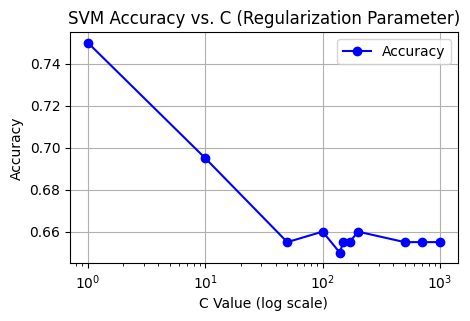

In [28]:
# plot accuracy vs. C values
def plot_acc_c(c_values, accs):
    plt.figure(figsize=(5, 3))
    plt.plot(c_values, accs, marker='o', linestyle='-', color='b', label='Accuracy')
    plt.xscale('log')
    plt.xlabel('C Value (log scale)')
    plt.ylabel('Accuracy')
    plt.title('SVM Accuracy vs. C (Regularization Parameter)')
    plt.grid(True)
    plt.legend()
    plt.show()
plot_acc_c(c_values, accs)

model accuracy (with C=1): 0.7800
model accuracy (with C=10): 0.7800
model accuracy (with C=50): 0.7800
model accuracy (with C=100): 0.7800
model accuracy (with C=140): 0.7800
model accuracy (with C=150): 0.7800
model accuracy (with C=170): 0.7800
model accuracy (with C=200): 0.7800
model accuracy (with C=1000): 0.7800
best accuracy at C = 1
best accuracy = 0.78


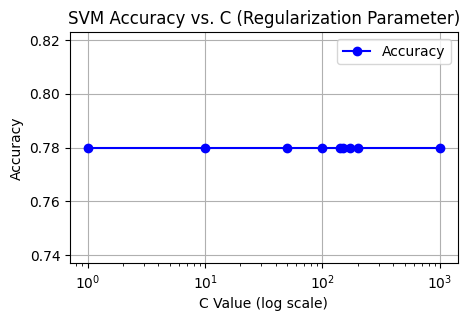

In [29]:
# svm with linear kernel and different c values
c_values = [1, 10, 50, 100, 140, 150, 170, 200, 1000]
best_c, best_acc = 0, 0
accs = []
for c in c_values:
    svc = SVC(kernel='linear', C=c)
    svc.fit(x_train, y_train)
    y_pred = svc.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accs.append(acc)
    if best_acc < acc:
        best_acc = acc
        best_c = c
    print(f'model accuracy (with C={c}): {acc:0.4f}')
print(f'best accuracy at C = {best_c}\nbest accuracy = {best_acc}')
plot_acc_c(c_values, accs)

model accuracy (with C=1): 0.7350
model accuracy (with C=10): 0.7050
model accuracy (with C=50): 0.6850
model accuracy (with C=100): 0.6650
model accuracy (with C=140): 0.6700
model accuracy (with C=150): 0.6700
model accuracy (with C=170): 0.6750
model accuracy (with C=200): 0.6850
model accuracy (with C=1000): 0.6900
best accuracy at C = 1
best accuracy = 0.735


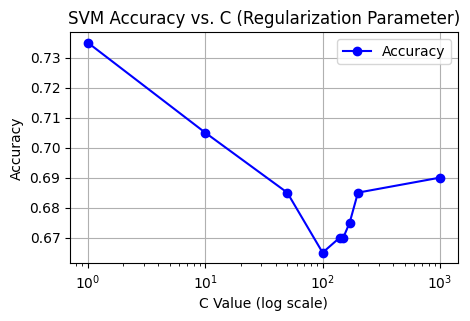

In [30]:
# svm with poly kernel and different c values
c_values = [1, 10, 50, 100, 140, 150, 170, 200, 1000]
best_c, best_acc = 0, 0
accs = []
for c in c_values:
    svc = SVC(kernel='poly', C=c)
    svc.fit(x_train, y_train)
    y_pred = svc.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accs.append(acc)
    if best_acc < acc:
        best_acc = acc
        best_c = c
    print(f'model accuracy (with C={c}): {acc:0.4f}')
print(f'best accuracy at C = {best_c}\nbest accuracy = {best_acc}')
plot_acc_c(c_values, accs)

model accuracy (with C=1): 0.7100
model accuracy (with C=10): 0.7100
model accuracy (with C=50): 0.6550
model accuracy (with C=100): 0.6600
model accuracy (with C=140): 0.7150
model accuracy (with C=150): 0.6650
model accuracy (with C=170): 0.6650
model accuracy (with C=200): 0.6850
model accuracy (with C=1000): 0.6650
best accuracy at C = 140
best accuracy = 0.715


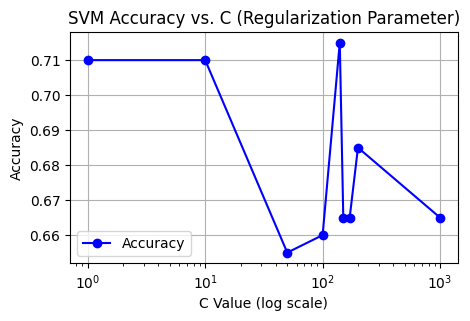

In [31]:
# svm with sigmoid kernel and different c values
c_values = [1, 10, 50, 100, 140, 150, 170, 200, 1000]
best_c, best_acc = 0, 0
accs = []
for c in c_values:
    svc = SVC(kernel='sigmoid', C=c)
    svc.fit(x_train, y_train)
    y_pred = svc.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accs.append(acc)
    if best_acc < acc:
        best_acc = acc
        best_c = c
    print(f'model accuracy (with C={c}): {acc:0.4f}')
print(f'best accuracy at C = {best_c}\nbest accuracy = {best_acc}')
plot_acc_c(c_values, accs)

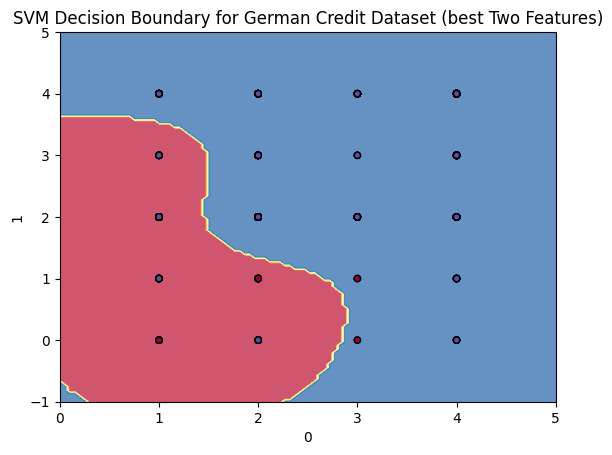

In [32]:
from sklearn.inspection import DecisionBoundaryDisplay
x_plot = df.iloc[:, [0, 2]].values  # best 2 features
y_plot = df['label'].values  # target variable

svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm.fit(x_plot, y_plot)

DecisionBoundaryDisplay.from_estimator(
    svm,
    x_plot,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel=df.columns[0],
    ylabel=df.columns[1],
)

plt.scatter(x_plot[:, 0], x_plot[:, 1], 
            c=y_plot, 
            s=20, edgecolors="k", cmap=plt.cm.Spectral)
plt.title("SVM Decision Boundary for German Credit Dataset (best Two Features)")
plt.show()